# 📊**Stock Analysis and Predictive Modeling of BMW Stock Data**

## 📝 **Metadata**

**Notebook Title:** Stock Analysis and Predictive Modeling of BMW Stock Data  
**Author:** Vishnu Vineeth P M

**Date Created:** January 2025   
**Tools Used:** Python, Pandas, Plotly, Statsmodels, Scikit-learn  
**Objective:** To perform exploratory data analysis (EDA) on BMW stock data, and create a Predictive model to predict the future stock price

#📈 Introduction

This project focuses on analyzing and predicting the stock market performance of BMW, one of the leading automotive companies in the world. The primary goal is to leverage data science techniques to gain insights into historical stock data, identify patterns, and build predictive models for future price movements. By doing so, the project provides actionable insights that could assist investors and stakeholders in making informed decisions.

# **Column Profiling**

---


| Column Name   | Description                                    | Data Type |
| ------------- | ---------------------------------------------- | --------- |
| **Date**      | Date of stock record                           | `object`  |
| **Adj_Close** | Adjusted close price after splits/dividends    | `float64` |
| **Close**     | Closing price of the stock                     | `float64` |
| **High**      | Highest price during the trading day           | `float64` |
| **Low**       | Lowest price during the trading day            | `float64` |
| **Open**      | Opening price of the stock                     | `float64` |
| **Volume**    | Total number of shares traded during the day   | `int64`   |

---

# 📚**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.linear_model import Ridge , Lasso

#📥*Understand the Data*

In [ ]:
!gdown 16yWV1X1xnvAjqUIYPYYjn5b94XKRdrep

Downloading...
From: https://drive.google.com/uc?id=16yWV1X1xnvAjqUIYPYYjn5b94XKRdrep
To: /content/BMW_Data.csv
100% 556k/556k [00:00<00:00, 42.8MB/s]


In [ ]:
df = pd.read_csv("BMW_Data.csv")
df.head()

Date  Adj_Close      Close       High        Low       Open   Volume
0  1996-11-08   8.100290  18.171000  18.209999  18.171000  18.209999   767000
1  1996-11-11   8.078445  18.122000  18.200001  18.082001  18.190001   260000
2  1996-11-12   8.139520  18.259001  18.327999  18.091999  18.160999  1066000
3  1996-11-13   8.126592  18.230000  18.344000  18.190001  18.344000   793000
4  1996-11-14   8.152893  18.289000  18.289000  18.132000  18.205000   351000

In [ ]:
df.tail()

Date  Adj_Close      Close       High        Low       Open  \
7207  2024-12-19  77.279999  77.279999  78.379997  76.900002  77.080002   
7208  2024-12-20  77.580002  77.580002  77.860001  76.120003  76.699997   
7209  2024-12-23  76.940002  76.940002  77.680000  76.260002  77.620003   
7210  2024-12-27  78.339996  78.339996  78.459999  76.739998  76.879997   
7211  2024-12-30  78.980003  78.980003  79.040001  77.839996  77.919998   

       Volume  
7207  1297262  
7208  2000177  
7209   642208  
7210   958948  
7211   456155

In [ ]:
#shape of the dataset
df.shape

(7212, 7)

There are 7212 rows and 7 columns in the dataset

In [ ]:
#start date
df["Date"].min()

'1996-11-08'

In [ ]:
#end date
df["Date"].max()

'2024-12-30'

The dataset consists of stock prices from **1996-11-08** to **2024-12-30**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7212 non-null   object 
 1   Adj_Close  7212 non-null   float64
 2   Close      7212 non-null   float64
 3   High       7212 non-null   float64
 4   Low        7212 non-null   float64
 5   Open       7212 non-null   float64
 6   Volume     7212 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 394.5+ KB


In [ ]:
#general analysis
df.describe().T

count          mean           std        min           25%  \
Adj_Close  7212.0  3.602020e+01  2.364110e+01   8.065074  1.644325e+01   
Close      7212.0  5.642753e+01  2.524589e+01  17.040001  3.445750e+01   
High       7212.0  5.711114e+01  2.541515e+01  17.815001  3.490000e+01   
Low        7212.0  5.572069e+01  2.505566e+01  16.000000  3.388750e+01   
Open       7212.0  5.644673e+01  2.525226e+01  17.280001  3.446500e+01   
Volume     7212.0  2.107946e+06  1.467180e+06   0.000000  1.194308e+06   

                    50%           75%           max  
Adj_Close  2.632921e+01  5.332921e+01  1.080590e+02  
Close      4.937250e+01  7.933250e+01  1.226000e+02  
High       5.009500e+01  8.010500e+01  1.237500e+02  
Low        4.875250e+01  7.834250e+01  1.203500e+02  
Open       4.926750e+01  7.938000e+01  1.233000e+02  
Volume     1.793778e+06  2.636572e+06  2.871954e+07

#📊 🔍*Exploratory Data Analysis (EDA)*

##Missing values and duplicate treatment

In [ ]:
#missing values
df.isna().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [ ]:
#duplicates
df.duplicated().sum()

0

There are no missing values or duplicates in the dataset

##Feature engineering

In [ ]:
#creating a copy of df
df1 = df.copy()

In [ ]:
#changing the "Date" column into datetime
df1["Date"] = pd.to_datetime(df1["Date"])

#extracting Year, month, week and day
df1["Year"] = df1["Date"].dt.year
df1["Month"] = df1["Date"].dt.month_name()
df1["Day"] = df1["Date"].dt.day
df1["Day of Week"] = df1["Date"].dt.day_name()

In [ ]:
df1.head()

Date  Adj_Close      Close       High        Low       Open   Volume  \
0 1996-11-08   8.100290  18.171000  18.209999  18.171000  18.209999   767000   
1 1996-11-11   8.078445  18.122000  18.200001  18.082001  18.190001   260000   
2 1996-11-12   8.139520  18.259001  18.327999  18.091999  18.160999  1066000   
3 1996-11-13   8.126592  18.230000  18.344000  18.190001  18.344000   793000   
4 1996-11-14   8.152893  18.289000  18.289000  18.132000  18.205000   351000   

   Year     Month  Day Day of Week  
0  1996  November    8      Friday  
1  1996  November   11      Monday  
2  1996  November   12     Tuesday  
3  1996  November   13   Wednesday  
4  1996  November   14    Thursday

In [ ]:
df1.tail()

Date  Adj_Close      Close       High        Low       Open  \
7207 2024-12-19  77.279999  77.279999  78.379997  76.900002  77.080002   
7208 2024-12-20  77.580002  77.580002  77.860001  76.120003  76.699997   
7209 2024-12-23  76.940002  76.940002  77.680000  76.260002  77.620003   
7210 2024-12-27  78.339996  78.339996  78.459999  76.739998  76.879997   
7211 2024-12-30  78.980003  78.980003  79.040001  77.839996  77.919998   

       Volume  Year     Month  Day Day of Week  
7207  1297262  2024  December   19    Thursday  
7208  2000177  2024  December   20      Friday  
7209   642208  2024  December   23      Monday  
7210   958948  2024  December   27      Friday  
7211   456155  2024  December   30      Monday

In [ ]:
#getting the highest and lowest stock prices and Volume
highest_price = df1.loc[df1['Adj_Close'].idxmax()]
lowest_price = df1.loc[df1['Adj_Close'].idxmin()]

highest_volume = df1.loc[df1['Volume'].idxmax()]
lowest_volume = df1.loc[df1['Volume'].idxmin()]

In [ ]:
highest_price

Date           2024-04-08 00:00:00
Adj_Close               108.059044
Close                       114.75
High                        114.75
Low                         112.75
Open                    113.199997
Volume                      827527
Year                          2024
Month                        April
Day                              8
Day of Week                 Monday
Name: 7025, dtype: object

In [ ]:
lowest_price

Date           1998-10-08 00:00:00
Adj_Close                 8.065074
Close                    18.091999
High                        19.704
Low                         17.798
Open                        19.468
Volume                     5448746
Year                          1998
Month                      October
Day                              8
Day of Week               Thursday
Name: 499, dtype: object

In [ ]:
highest_volume

Date           2000-03-17 00:00:00
Adj_Close                13.368979
Close                        29.99
High                         33.09
Low                      29.610001
Open                          32.5
Volume                    28719542
Year                          2000
Month                        March
Day                             17
Day of Week                 Friday
Name: 875, dtype: object

In [ ]:
lowest_volume

Date           1996-12-24 00:00:00
Adj_Close                 9.238817
Close                       20.725
High                        20.725
Low                         20.725
Open                        20.725
Volume                           0
Year                          1996
Month                     December
Day                             24
Day of Week                Tuesday
Name: 32, dtype: object

##Univariate Analysis

###Distribution of Numerical variables

In [ ]:
#numerical and categorical columns
num_cols = ['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']

cat_cols = ['Month', 'Day of Week']

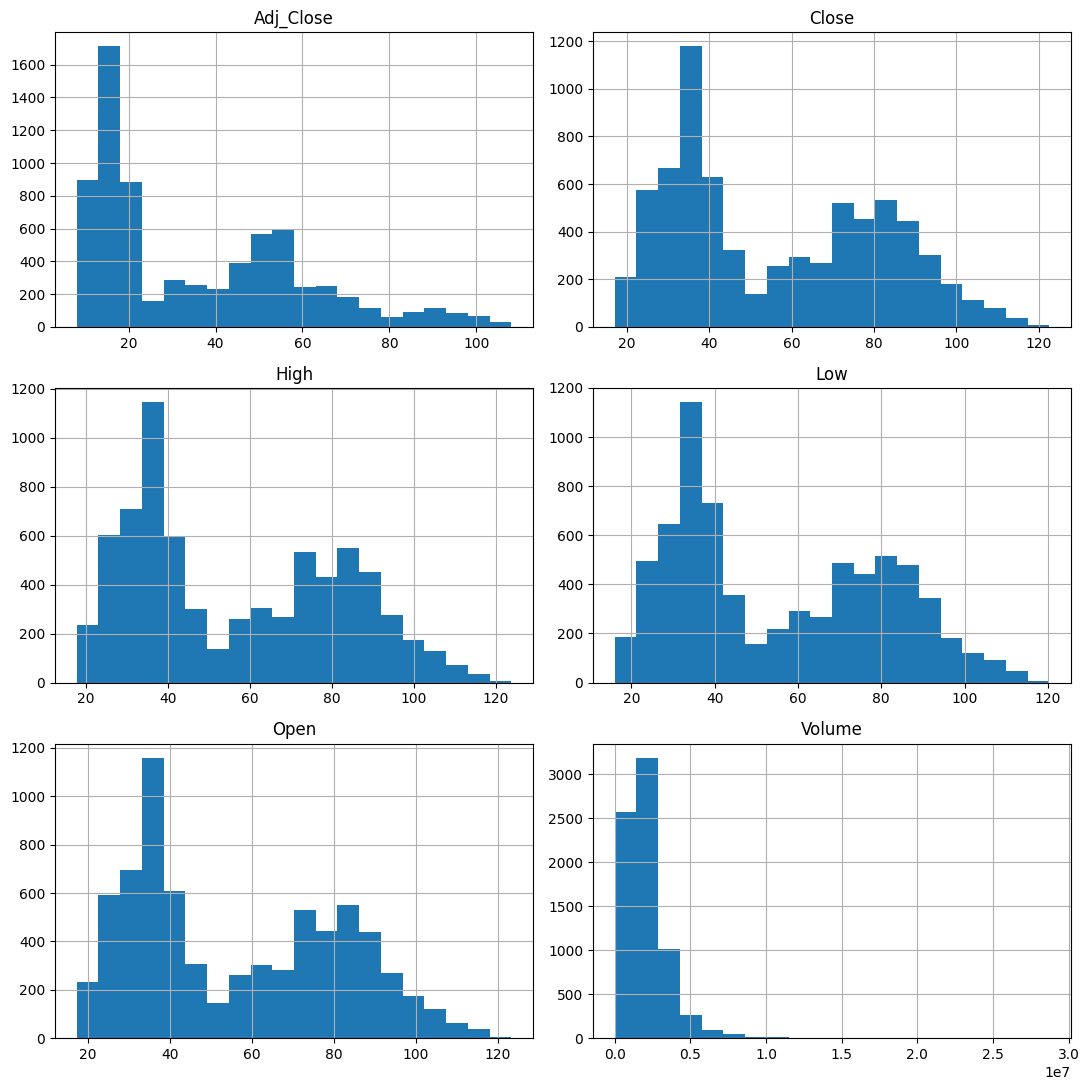

In [ ]:
#histograms to see the distribution of numerical values
df[num_cols].hist(figsize = (11, 11), bins = 20)
plt.tight_layout()
plt.show()

###Distribution of Categorical variables

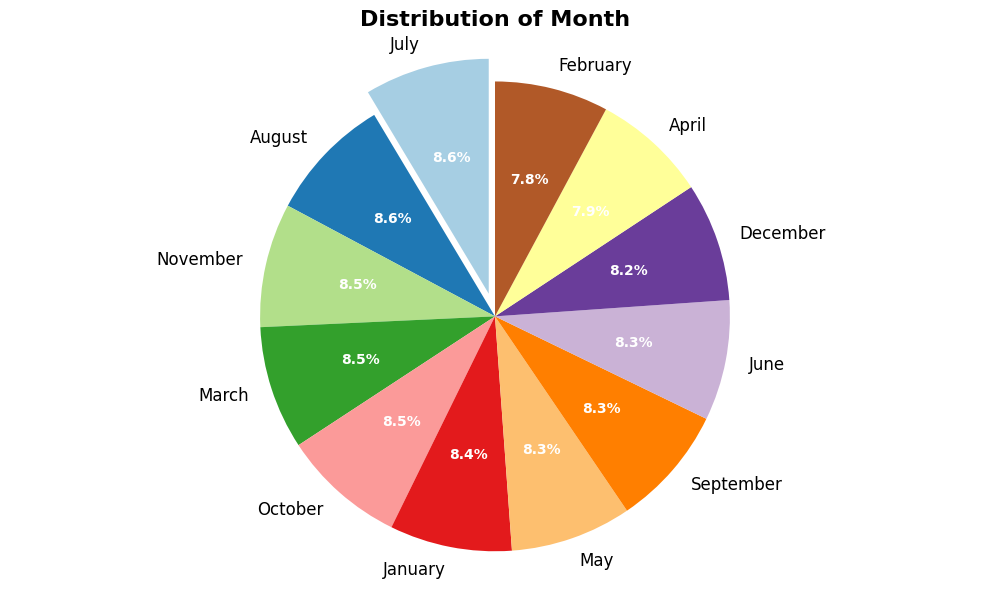

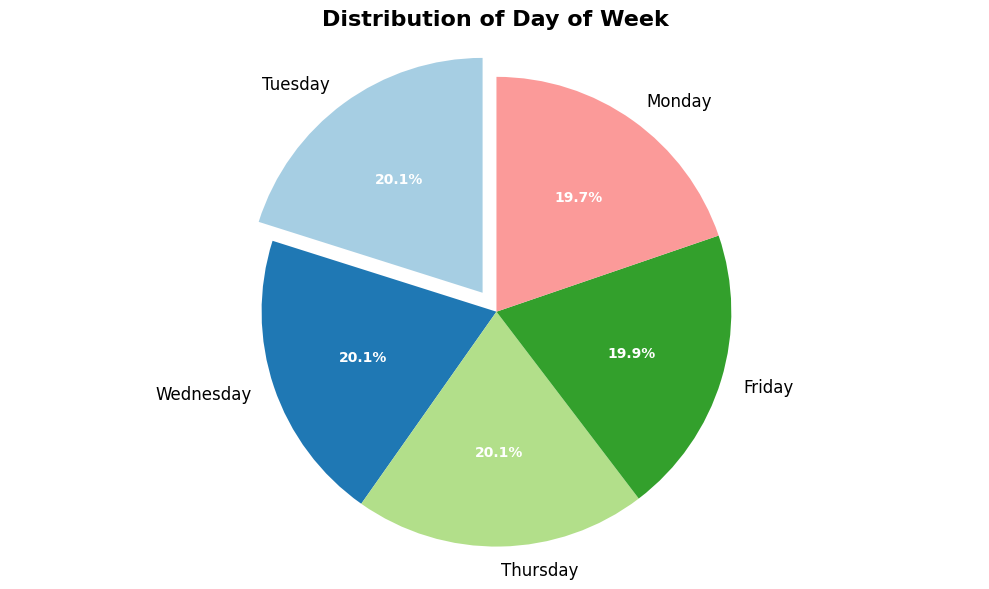

In [ ]:
# Distribution of categorical values
for col in cat_cols:
    plt.figure(figsize=(10, 6))

    # Extract values and labels
    values = df1[col].value_counts()
    labels = values.index
    num_wedges = len(values)

    # Custom explode: Highlight the largest category
    explode = [0.1 if i == 0 else 0 for i in range(num_wedges)]

    #color palette
    colors = plt.cm.Paired(range(num_wedges))

    # Create the pie chart
    wedges, texts, autotexts = plt.pie(
        values, labels=labels, autopct='%1.1f%%', explode=explode,
        colors=colors, startangle=90, textprops={'fontsize': 12}
    )

    # Style adjustments
    plt.setp(autotexts, size=10, weight="bold", color="white")  # Adjust percentage text
    plt.setp(texts, size=12)
    plt.title(f'Distribution of {col}', fontsize=16, weight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
    plt.tight_layout()

    # Display the plot
    plt.show()


###Count plot

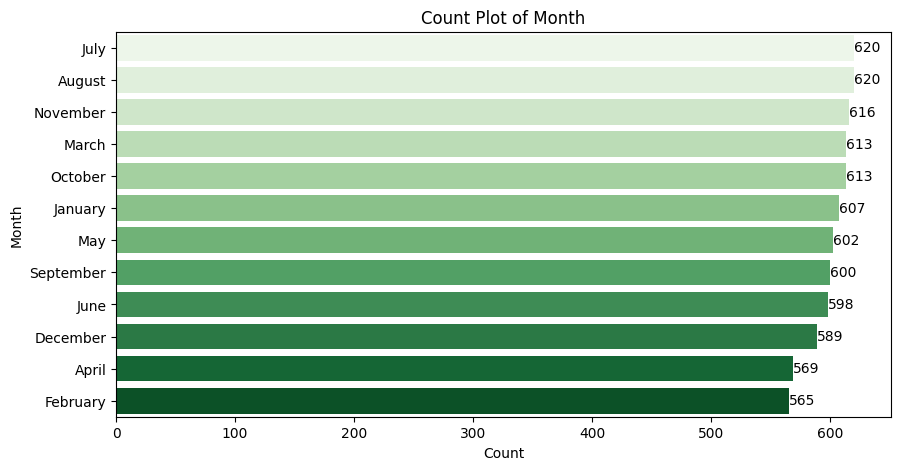

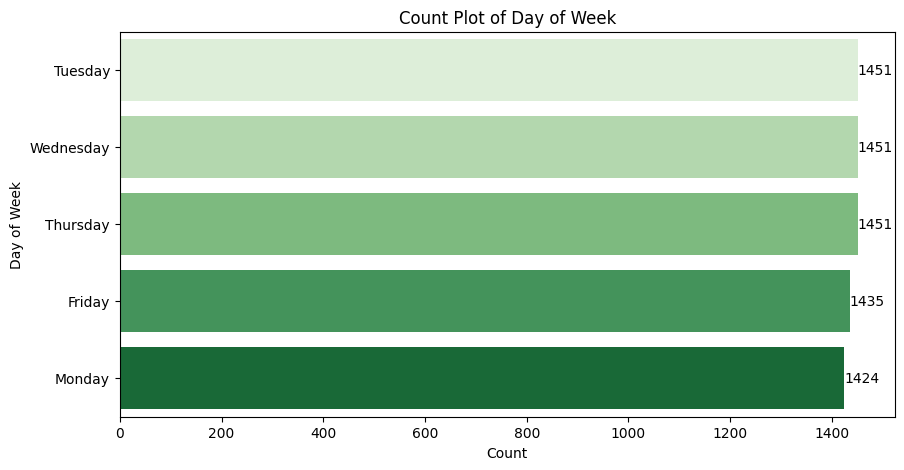

In [ ]:
#count plot for the categorical data
for col in cat_cols:
  plt.figure(figsize=(10, 5))

  sorted_cat = df1[col].value_counts().sort_values(ascending=False)

  ax = sns.countplot(data=df1, y=col, order=sorted_cat.index, palette= 'Greens')
  for i in ax.containers:
    ax.bar_label(i,)
  plt.xlabel('Count')
  plt.title(f'Count Plot of {col}')
  plt.show()

##Bivariate Analysis


###Volume over Time

In [ ]:
fig2 = px.bar(
    df1,
    x='Date',
    y='Volume',
    title='Volume Over Time',
    labels={'Volume': 'Trading Volume', 'Date': 'Date'},
    template='plotly_dark'
)
fig2.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig2.show()

###Yearly Trends in Adjacent Close Price

In [ ]:
yearly_trends = df1.groupby('Year')['Adj_Close'].mean().reset_index()

fig1 = px.line(
    yearly_trends,
    x='Year',
    y='Adj_Close',
    title='Yearly Average Adjusted Close Price',
    labels={'Adj_Close': 'Average Adj Close Price', 'Year': 'Year'},
)
fig1.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig1.show()

**Insights**

- During the Covid-19 years, we can see a downfall of stock prices for the company
- From 2021 onwards the stock prices is seen increased

###Monthly Average Adjusted Close Price

In [ ]:
monthly_avg = df1.groupby(['Year', 'Month'])['Adj_Close'].mean().reset_index()
monthly_avg['Year-Month'] = monthly_avg['Year'].astype(str) + '-' + monthly_avg['Month'].astype(str).str.zfill(2)

fig1 = px.line(
    monthly_avg,
    x='Year-Month',
    y='Adj_Close',
    title='Monthly Average Adjusted Close Price',
    labels={'Adj_Close': 'Average Adj Close Price', 'Year-Month': 'Year-Month'}
)
fig1.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig1.show()

**Insights**
- From 2022 October till the date the average monthly stock prices is increasing

###Trading Volume by Date

In [ ]:
volume_analysis = df1.groupby(['Year', 'Month'])['Volume'].sum().reset_index()
volume_analysis['Year-Month'] = volume_analysis['Year'].astype(str) + '-' + volume_analysis['Month'].astype(str).str.zfill(2)

fig4 = px.bar(
    volume_analysis,
    x='Year-Month',
    y='Volume',
    title='Monthly Trading Volume',
    labels={'Volume': 'Total Trading Volume', 'Year-Month': 'Year-Month'},
)
fig4.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig4.show()

###Open VS Close

In [ ]:
fig2 = px.scatter(
    df1,
    x='Open',
    y='Close',
    trendline='ols',
    title='Relationship Between Open and Close Prices',
    labels={'Open': 'Opening Price', 'Close': 'Closing Price'}
)
fig2.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')

# Change the color of the OLS trend line
for trace in fig2.data:
    if trace.mode == 'lines':  # Identify the trend line trace
        trace.line.color = 'red'
fig2.show()

**Insights**
- We can see a linear relationship between the Open and Close prices of BMW stock
- There is no much deviations of closing prices from the opening price

###Volume Spikes

In [ ]:
# Identify volume spikes (above 95th percentile)
volume_spike_threshold = df1['Volume'].quantile(0.95)
print("Volume Spike threshold", volume_spike_threshold)
volume_spike_data = df1[df1['Volume'] > volume_spike_threshold]

fig2 = px.scatter(
    volume_spike_data,
    x='Date',
    y='Volume',
    title='Volume Spikes Above 95th Percentile',
    labels={'Volume': 'Trading Volume'},
    color='Adj_Close',
    color_continuous_scale='viridis'
)
fig2.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig2.show()

Volume Spike threshold 4582242.049999999


**Insights**
- There was a significant Volume spiking during 2005 - 2012 years

##Multivariate analysis

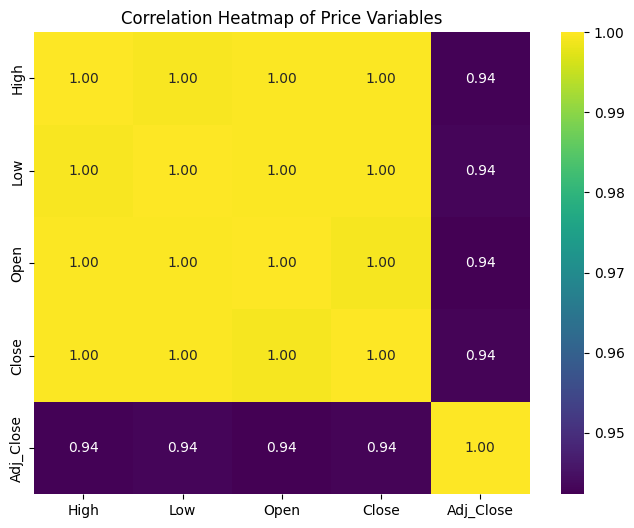

In [ ]:
#Heatmap
price_columns = ['High', 'Low', 'Open', 'Close', 'Adj_Close']
price_correlation = df[price_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(price_correlation, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Price Variables')
plt.show()

##Trend Analysis

In [ ]:
# Seasonal Decomposition of Adj_Close
df.set_index('Date', inplace=True)
seasonal_decomposition = seasonal_decompose(df['Adj_Close'], model='multiplicative', period=365)

In [ ]:
fig1 = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=0.1)

fig1.add_trace(go.Scatter(x=seasonal_decomposition.trend.index, y=seasonal_decomposition.trend, mode='lines', name='Trend'), row=1, col=1)
fig1.add_trace(go.Scatter(x=seasonal_decomposition.seasonal.index, y=seasonal_decomposition.seasonal, mode='lines', name='Seasonality'), row=2, col=1)
fig1.add_trace(go.Scatter(x=seasonal_decomposition.resid.index, y=seasonal_decomposition.resid, mode='lines', name='Residuals'), row=3, col=1)

fig1.update_layout(
    title='Seasonal Decomposition of BMW Stock Adjusted Close',
    plot_bgcolor='black', paper_bgcolor='black', font_color='white'
)
fig1.show()

**Insights**
- Trend : BMW's trend component shows that there is a positive long term trend which suggests it's strong historical importance
- Seasonality : The seasonal component shows that during certain time of an year are more volatile or favourible for the BMW's stock price (higher sales during summer)
- Residuals : Sudden increases or spikes in the residuals shows the global or company-specific events(eg : new model releases, supply chain disruptions).

###CandleStick Chart

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df1['Year'],
                                      open=df1['Open'],
                                      high=df1['High'],
                                      low=df1['Low'],
                                      close=df1['Close'])])
fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Year',
                  yaxis_title='Price')
fig.show()

**Insights**
- There is a strong upward movement in the stock prices during 2009 - 2015. A similar trend is also seen after 2020 but having slight fluctuations
- There was a downfall of stock prices duing the 2008 - 2009(global financial crisis) and covid time(2020)

##Feature Engineering

###Moving Averages

Moving Averages (MA) is a statistical method used to analyze data points by creating a series of averages from subsets of the full data set. It is commonly applied in time series analysis, particularly in financial markets, to smooth out short-term fluctuations and highlight longer-term trends.

In [ ]:
df2 = df.copy()
df2['MA_30'] = df2['Adj_Close'].rolling(window=30).mean()
df2['MA_50'] = df2['Adj_Close'].rolling(window=50).mean()
df2['MA_100'] = df2['Adj_Close'].rolling(window=100).mean()
df2['MA_200'] = df2['Adj_Close'].rolling(window=200).mean()


In [ ]:
#examining the 200th row
df2.iloc[199]

Adj_Close        11.720482
Close            26.292000
High             27.531000
Low              26.271999
Open             27.531000
Volume       660400.000000
MA_30            12.854444
MA_50            12.685597
MA_100           12.484977
MA_200           10.999157
Name: 1997-08-14, dtype: float64

###Relative Strength Index(RSI)



RSI stands for Relative Strength Index, a popular technical analysis indicator used in financial markets to measure the magnitude of recent price changes. It helps traders and investors determine whether a stock, commodity, or other security is overbought or oversold.
- It ranges from 0 to 100
- Overbought and Oversold Levels:
    - **Above 70**: Indicates the asset may be overbought or overvalued (potential for a price pullback or correction).
    - **Below 30**: Indicates the asset may be oversold or undervalued (potential for a price increase or rebound).
- Default Calculation Period: Typically calculated over a **14**-day period.

In [ ]:
#Relative Strenght Index
def calculate_rsi(data, period = 14) :
  delta = data['Adj_Close'].diff().dropna()

  #gain and loss
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)

  #average gain and average loss
  avg_gain = gain.rolling(window = period, min_periods = 1).mean()
  avg_loss = abs(loss).rolling(window = period, min_periods = 1).mean()

  #relative strength
  rs = avg_gain / avg_loss
  rsi = 100 - (100 / (1 + rs))

  return rsi

df2['RSI_14'] = calculate_rsi(df2, period = 14)

###Price Range

The Price Range represents the difference between the highest price and the lowest price of a stock, commodity, or any financial asset within a specific time frame (e.g., daily, weekly, or monthly).

In [ ]:
df2['Price Range'] = df2['High'] - df2['Low']

###Daily Return Percentage

The daily return percentage measures the percentage change in the price of a financial asset (like a stock or cryptocurrency) from one day to the next. It reflects how much the price has increased or decreased as a proportion of the previous day's price.

In [ ]:
df2['Daily Return'] = df2['Adj_Close'].pct_change()

In [ ]:
df2.head()

Adj_Close      Close       High        Low       Open   Volume  \
Date                                                                         
1996-11-08   8.100290  18.171000  18.209999  18.171000  18.209999   767000   
1996-11-11   8.078445  18.122000  18.200001  18.082001  18.190001   260000   
1996-11-12   8.139520  18.259001  18.327999  18.091999  18.160999  1066000   
1996-11-13   8.126592  18.230000  18.344000  18.190001  18.344000   793000   
1996-11-14   8.152893  18.289000  18.289000  18.132000  18.205000   351000   

            MA_30  MA_50  MA_100  MA_200     RSI_14  Price Range  Daily Return  
Date                                                                            
1996-11-08    NaN    NaN     NaN     NaN        NaN     0.039000           NaN  
1996-11-11    NaN    NaN     NaN     NaN   0.000000     0.118000     -0.002697  
1996-11-12    NaN    NaN     NaN     NaN  73.655216     0.236000      0.007560  
1996-11-13    NaN    NaN     NaN     NaN  63.720486     0.153999     -0.001588  
1996-11-14    NaN    NaN     NaN     NaN  71.532300     0.157000      0.003236

In [ ]:
df2.tail()

Adj_Close      Close       High        Low       Open   Volume  \
Date                                                                         
2024-12-19  77.279999  77.279999  78.379997  76.900002  77.080002  1297262   
2024-12-20  77.580002  77.580002  77.860001  76.120003  76.699997  2000177   
2024-12-23  76.940002  76.940002  77.680000  76.260002  77.620003   642208   
2024-12-27  78.339996  78.339996  78.459999  76.739998  76.879997   958948   
2024-12-30  78.980003  78.980003  79.040001  77.839996  77.919998   456155   

                MA_30    MA_50   MA_100     MA_200     RSI_14  Price Range  \
Date                                                                         
2024-12-19  72.287334  72.9908  75.9128  85.262267  72.546614     1.479996   
2024-12-20  72.620667  73.0268  75.8680  85.133273  69.601136     1.739998   
2024-12-23  72.924001  73.0408  75.8392  85.007106  67.019876     1.419998   
2024-12-27  73.294667  73.1020  75.8272  84.903476  66.487210     1.720001   
2024-12-30  73.728667  73.1868  75.8130  84.800787  63.755484     1.200005   

            Daily Return  
Date                      
2024-12-19     -0.009231  
2024-12-20      0.003882  
2024-12-23     -0.008250  
2024-12-27      0.018196  
2024-12-30      0.008170

In [ ]:
#visualizing the moving averages
fig3 = go.Figure()
#we use df2.index because the Date column is being used as the index of dataset.
fig3.add_trace(go.Scatter(x=df2.index, y=df2['Adj_Close'], mode='lines', name='Adj Close'))
fig3.add_trace(go.Scatter(x=df2.index, y=df2['MA_30'], mode='lines', name='30-Day MA'))
fig3.add_trace(go.Scatter(x=df2.index, y=df2['MA_50'], mode='lines', name='50-Day MA'))
fig3.add_trace(go.Scatter(x=df2.index, y=df2['MA_100'], mode='lines', name='100-Day MA'))
fig3.add_trace(go.Scatter(x=df2.index, y=df2['MA_200'], mode='lines', name='200-Day MA'))
fig3.update_layout(
    title='Moving Averages and Adj Close Price',
    xaxis_title='Date',
    yaxis_title='Price',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white'
)
fig3.show()

**Insights**

- We can see a steadily *upward trend* over the years, with occassional dips
- Short-term trends: The 30-day and 50-day MAs are more sensitive to daily price changes, making them suitable for short-term trading signals.
- Long-term trends: The 100-day and 200-day MAs highlight the broader market direction.

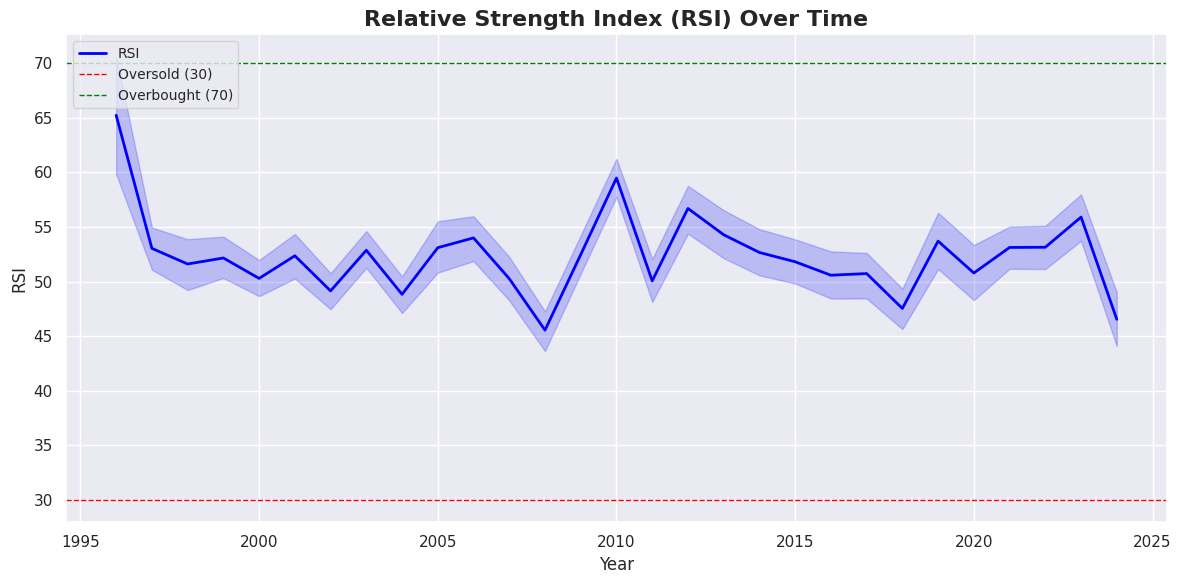

In [ ]:
#We need to extract Year from the Date inorder to visualize RSI over Time
df2.reset_index(inplace = True)

df2['Date'] = pd.to_datetime(df2['Date'])
df2['Year'] = df2['Date'].dt.year

# Set Seaborn theme
sns.set_theme(style="darkgrid", palette="muted")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='Year', y='RSI_14', linewidth=2, color='blue', label='RSI')
plt.title('Relative Strength Index (RSI) Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('RSI', fontsize=12)

# Add horizontal reference lines for RSI thresholds (30 and 70)
plt.axhline(y=30, color='red', linestyle='--', linewidth=1, label='Oversold (30)')
plt.axhline(y=70, color='green', linestyle='--', linewidth=1, label='Overbought (70)')

# Add a legend
plt.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.show()


**Insights**
- The RSI fluctuates between 30 (oversold) and 70 (overbought).
- It has generally remained within the range of 45–65, showing no extreme overbought or oversold conditions for most of the period.
- Around 2010, there is a significant upward spike, which might indicate strong bullish momentum in the market.
- Post-2020, there is a steep decline in RSI, signaling increased bearish momentum or reduced strength in price movements.

###Price Range Analysis

In [ ]:
#price range
fig4 = px.line(
    x=df2['Date'],
    y=df2['Price Range'],
    title='Daily Price Range Over Time',
    labels={'Date': 'Date', 'Price Range': 'Price Range'},
    template='plotly_dark'
)
fig4.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig4.show()

###Daily Return Analysis

In [ ]:
#Daily return analysis
fig5 = px.line(
    df2,
    y='Daily Return',
    x='Date',
    title='Distribution of Daily Returns',
    labels={'Daily Return': 'Daily Return', 'Date': 'Date'},
    template='plotly_dark'
)

# Add a horizontal line at y=0
fig5.update_layout(
    shapes=[
        dict(
            type='line',
            y0=0, y1=0,  # Starting and ending y-coordinate (y=0)
            x0=df2['Date'].min(), x1=df2['Date'].max(),  # Full x-axis range
            line=dict(color='red', width=2, dash='dash')  # Style of the line
        )
    ],
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white'
)

fig5.show()


##Outlier detection

In [ ]:
num_cols = df.select_dtypes(include = ['float64', 'int64']).columns
num_cols

Index(['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

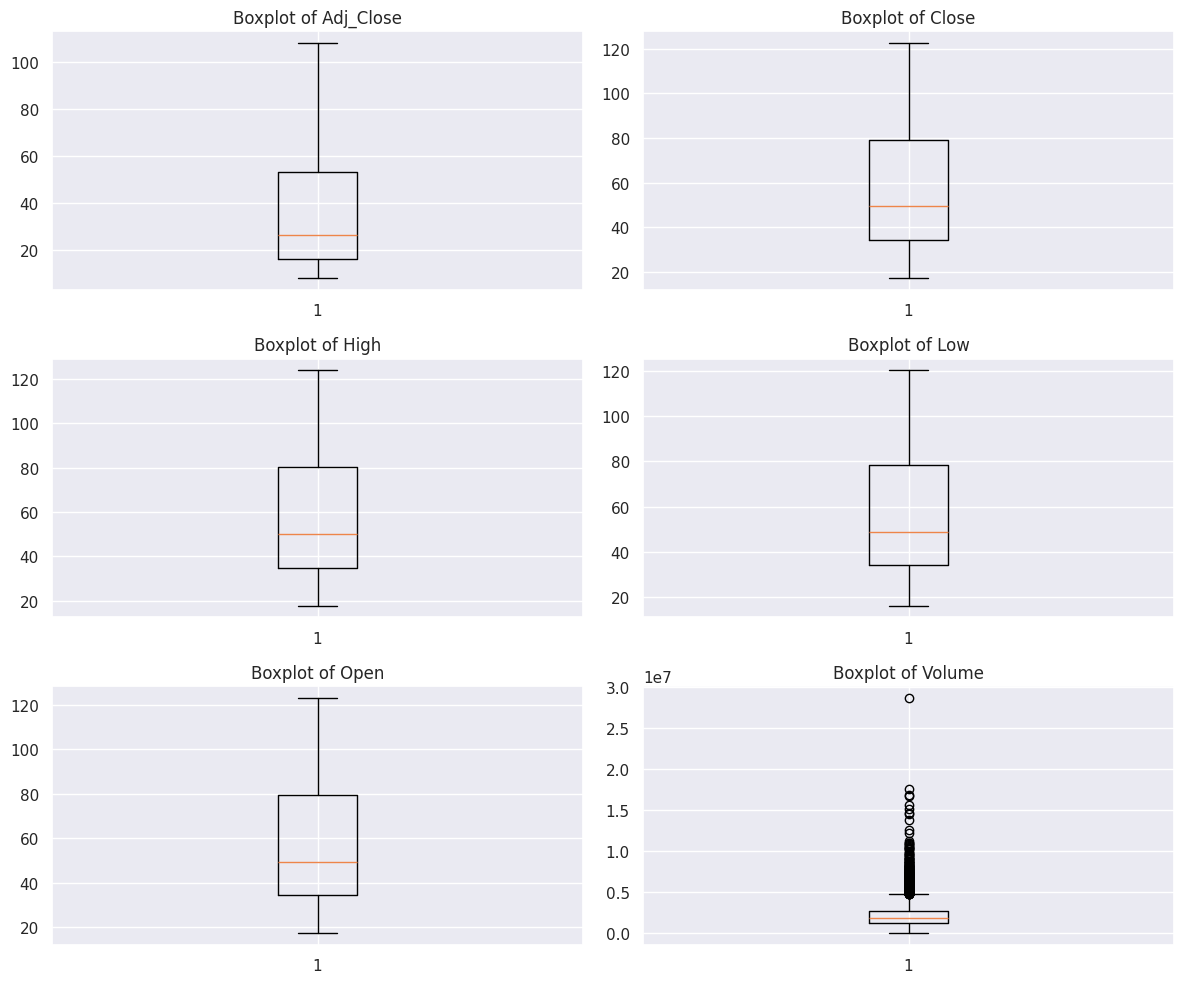

In [ ]:
#creating boxplots for numerical features
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))

for i, col in enumerate(num_cols) :
  ax = axes.flat[i]  # Access each subplot using flat indexing
  ax.boxplot(df[col])
  ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

We can see outliers in the Volume column

In [ ]:
#outlier treatment
def handle_outliers(data, column) :
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  IQR = q3 - q1

  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR

  data[column] = data[column].clip(lower_bound, upper_bound)

  return data

df = handle_outliers(df, 'Volume')

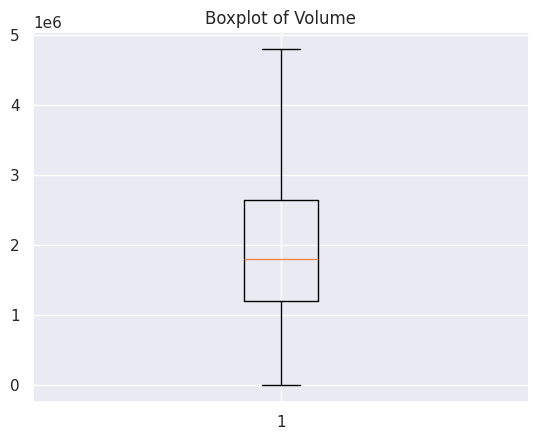

In [ ]:
plt.boxplot(df['Volume'])
plt.title('Boxplot of Volume')
plt.show()

There are no Outliers in the dataset

#*Predictive Modeling*

Inorder to create a predictive model we have to make the train and test data.

But before that we have to do data preprocessing.

In [ ]:
#percentage null values in the dataset
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

Adj_Close    0.0
Close        0.0
High         0.0
Low          0.0
Open         0.0
Volume       0.0
dtype: float64

Since less than 1% of the data contains null values, and these occur primarily within the first 30 rows due to the 30-day moving average calculation, we can safely remove the rows with null values.

In [ ]:
#dropping null values from the dataset
df.dropna(inplace = True)

###Train-test splitting

In [ ]:
#train and test data splitting
X = df[['Adj_Close', 'High', 'Low', 'Open', 'Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

In [ ]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (5769, 5)
Shape of X_test :  (1443, 5)
Shape of y_train :  (5769,)
Shape of y_test :  (1443,)


###Standardizing the Data

Since some features (like Volume) might have vastly different scales, scaling improves model performance.

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#creating a copy of X_test_scaled to view the scaled values
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled_df.head()

Adj_Close      High       Low      Open    Volume
0   1.492727  1.092278  1.108537  1.078979 -0.419666
1   1.487290  1.050811  1.099087  1.072165 -0.980021
2   1.417455  0.975491  0.965938  0.965276  0.330724
3   1.345528  0.964067  0.934583  0.985717  0.299567
4   1.307893  0.881554  0.869297  0.905231  0.593498

We can try using some Regression algorithms such as :
1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression.


In [ ]:
#Linear Regression
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
#Decision Tree
model2 = DecisionTreeRegressor()
model2.fit(X_train_scaled, y_train)


DecisionTreeRegressor()

In [ ]:
#Random Forest Regression
model3 = RandomForestRegressor(n_estimators= 100, random_state=42)
model3.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
#Let us evaluate the metrics of these models and compare the performances

def evaluate_model(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)
  return mae, mse, rmse, r2


for model in [model1, model2, model3]:
  y_pred = model.predict(X_test_scaled)
  mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
  print(f"Model: {model.__class__.__name__}")
  print(f"Mean Absolute Error: {mae:.2f}")
  print(f"Mean Squared Error: {mse:.2f}")
  print(f"RMSE: {rmse:.2f}")
  print(f"R2 Score: {r2*100:.2f}")
  print("="*50)

Model: LinearRegression
Mean Absolute Error: 0.45
Mean Squared Error: 0.34
RMSE: 0.59
R2 Score: 99.86
Model: DecisionTreeRegressor
Mean Absolute Error: 1.14
Mean Squared Error: 4.07
RMSE: 2.02
R2 Score: 98.31
Model: RandomForestRegressor
Mean Absolute Error: 1.48
Mean Squared Error: 6.35
RMSE: 2.52
R2 Score: 97.36


**Insights**

*Linear Regression:*

- Achieves the lowest errors (MAE, MSE, RMSE) and the highest R² score (99.86%), indicating it models the relationship between features and target variable exceptionally well.
- Suggests the data has a strong linear relationship, making this model the best fit for the dataset.

*Decision Tree Regressor:*

- Performs well, but with slightly higher errors (MAE: 1.14, RMSE: 2.02) and a slightly lower R² score (98.31%).
- Indicates the presence of some non-linear relationships, which it captures effectively, though it may overfit slightly on smaller datasets.

*Random Forest Regressor:*

- Slightly less accurate than Decision Tree (R²: 97.36%) but more robust to overfitting due to averaging across multiple trees.
- Higher MAE and RMSE compared to Linear Regression but still effective for non-linear data.

**Conclusion:**

- Linear Regression is the most appropriate model here, likely due to the predominantly linear patterns in the data.
- Decision Tree and Random Forest handle non-linearity better but are less effective due to the linear nature of the data.

In [ ]:
results = []
for model in [model1, model2, model3]:
    mae, mse, rmse, train_r2 = evaluate_model(y_train, model.predict(X_train_scaled))
    mae, mse, rmse, test_r2 = evaluate_model(y_test, model.predict(X_test_scaled))

    results.append({
        'Model': model.__class__.__name__,
        'Train Score %': round(train_r2*100,2),
        'Test Score %': round(test_r2*100,2) })

results_df = pd.DataFrame(results)
display(results_df)


Model  Train Score %  Test Score %
0       LinearRegression          99.97         99.86
1  DecisionTreeRegressor         100.00         98.31
2  RandomForestRegressor         100.00         97.36

##**Visualizing the Prediction of Linear Regression**

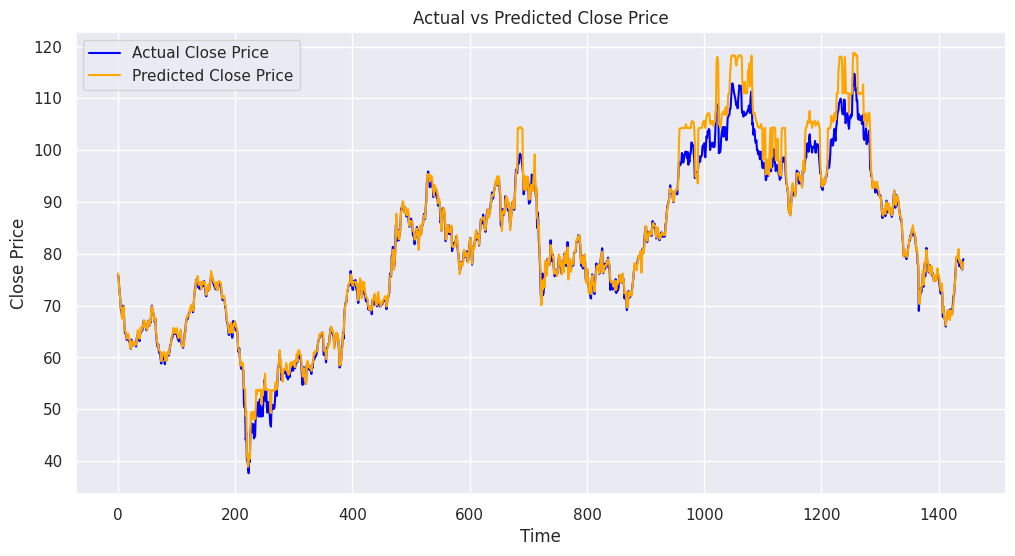

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred, label='Predicted Close Price', color='orange')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Insights**
- The mismatches in the Actual and Predicted close prices are seen during the Covid time, which our model could not recognize

#*Feature Importance*

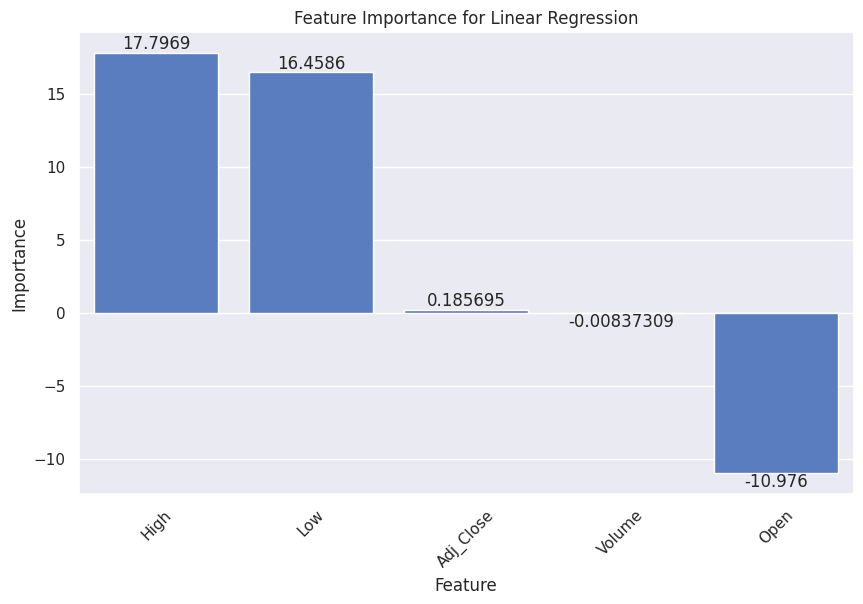

In [ ]:
#getting the feature importance of Linear regression model
importances = model1.coef_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

#plotting figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='Importance', x='Feature', data=importance_df)
plt.title('Feature Importance for Linear Regression')
for i in ax.containers :
  ax.bar_label(i,)
plt.xticks(rotation = 45)
plt.show()

#Make future predictions

Inroder to predict the future outcomes, we need to preprocess the given data first

In [ ]:
# Example: Predict for new data
future_data = [[77.04, 77.40, 75.90, 76.50, 973381],
               [79.26, 80.28, 76.46, 77.24, 1485416],
               [77.84, 78.80, 77.56, 78.18, 1156006]
               ]

#scaling
future_data_scaled = scaler.transform(future_data)
#predicting
future_prediction = model.predict(future_data_scaled)
for i in future_prediction :
  print("Predicted price :", i)

Predicted price : 76.63819999860006
Predicted price : 79.35440056029992
Predicted price : 78.1471990972


The example data given are actually the data on January 15th, 20th and 21st.
The actual closing prices were
- 77.04(Jan 15th)
- 79.26(Jan 20th)
- 77.84(Jan 21st)


An error of less than ±0.50 is only seen in the predicted values

https://finance.yahoo.com/quote/BMW.DE/history/   (BMW stock price history)

#Thank you!😊